In [19]:
(require '[acausal.core :as a :refer [defmodel q p]]
         '[acausal.plot :as plt]
         '[clojure.repl :refer [doc]]
         '[acausal.html-table]
         :reload)

In [13]:
(def kidney-data
    (a/read-csv "kidney.csv"))

#'user/kidney-data

In [14]:
(a/head kidney-data)

:treatment,:size,:success
"""surgery""","""small""","""yes"""
"""nephrolithotomy""","""large""","""yes"""
"""surgery""","""small""","""yes"""
"""surgery""","""small""","""yes"""
"""nephrolithotomy""","""large""","""yes"""
"""surgery""","""large""","""yes"""
"""nephrolithotomy""","""small""","""yes"""
"""surgery""","""small""","""yes"""
"""nephrolithotomy""","""large""","""no"""
"""nephrolithotomy""","""large""","""yes"""


In [14]:
(def kidney-distribution
    (a/categorical
        kidney-data
        :support {:treatment ["surgery" "nephrolithotomy"]
                  :size ["large" "small"]
                  :success ["yes" "no"]}))

#'user/kidney-distribution

In [9]:
(float
    (a/estimate-categorical-query
        kidney-distribution
        (q [:success] :given [:treatment :size])
        {:success "yes", :treatment "surgery" :size "small"}))

0.9310345

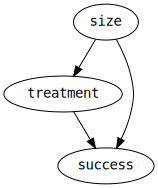

In [15]:
(defmodel charig1968
    {:size []
     :treatment [:size]
     :success [:treatment :size]})

In [16]:
(a/define f
    (a/identify
        charig1968
        (q [:success] :do [:treatment])))

In [23]:
kidney-distribution

{:samples ({:treatment "surgery", :size "small", :success "yes"} {:treatment "nephrolithotomy", :size "large", :success "yes"} {:treatment "surgery", :size "small", :success "yes"} {:treatment "surgery", :size "small", :success "yes"} {:treatment "nephrolithotomy", :size "large", :success "yes"} {:treatment "surgery", :size "large", :success "yes"} {:treatment "nephrolithotomy", :size "small", :success "yes"} {:treatment "surgery", :size "small", :success "yes"} {:treatment "nephrolithotomy", :size "large", :success "no"} {:treatment "nephrolithotomy", :size "large", :success "yes"} {:treatment "surgery", :size "small", :success "yes"} {:treatment "surgery", :size "large", :success "yes"} {:treatment "nephrolithotomy", :size "small", :success "yes"} {:treatment "nephrolithotomy", :size "large", :success "no"} {:treatment "surgery", :size "large", :success "yes"} {:treatment "surgery", :size "large", :success "yes"} {:treatment "nephrolithotomy", :size "small", :success "yes"} {:treatme

In [17]:
(a/define tmp
    (a/estimate-categorical
    kidney-distribution
    f
    {:treatment "surgery"}))

#acausal.core.EstimatedCategorical{:pmf {{:success "yes"} 634983/762700, {:success "no"} 127717/762700}}

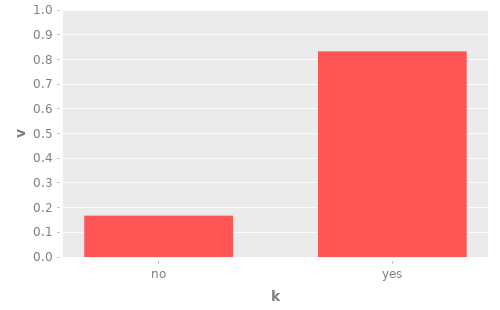

In [69]:
(plt/plot-distribution tmp)

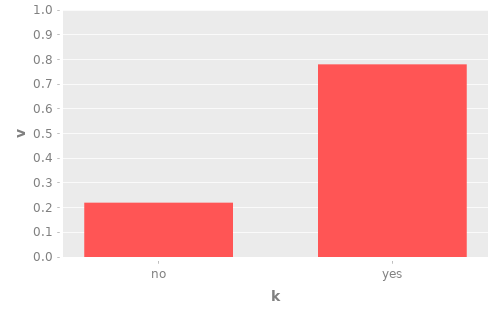

In [20]:
(plt/plot-distribution
    (a/estimate-categorical
        kidney-distribution
        (q [:success] :given [:treatment])
        {:treatment "surgery"}))

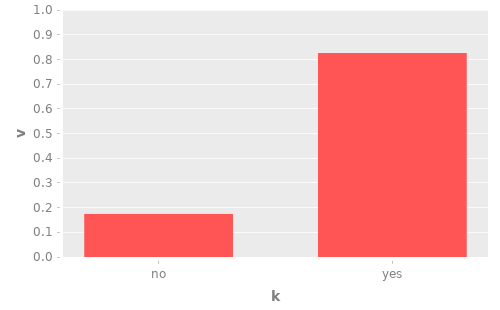

In [21]:
(plt/plot-distribution
    (a/estimate-categorical
        kidney-distribution
        (q [:success] :given [:treatment])
        {:treatment "nephrolithotomy"}))

In [22]:
(a/estimate-categorical
        kidney-distribution
        (q [:success] :given [:treatment])
        {:treatment "nephrolithotomy"})

#acausal.core.EstimatedCategorical{:pmf {{:success "yes"} 289/350, {:success "no"} 61/350}}

In [21]:
(a/estimate-categorical-point kidney-distribution
                              f
                              {:treatment "surgery"
                               :success "yes"})

634983/762700

In [33]:
(a/estimate-categorical-formula kidney-distribution
                                f
                                {:treatment "surgery"})

{{:success "yes"} 634983/762700, {:success "no"} 127717/762700}

In [34]:
(a/define tmp
    (a/all-bindings
        (select-keys (:support kidney-distribution)
                     #{:success :treatment})))

({:success "yes", :treatment "surgery"} {:success "yes", :treatment "nephrolithotomy"} {:success "no", :treatment "surgery"} {:success "no", :treatment "nephrolithotomy"})

In [36]:
(a/estimate-categorical-formula
    kidney-distribution
    {:sub #{:success} :sum {:p #{:size :treatment}}}
    {:size "small" :treatment "surgery"})

87/350

In [39]:
(float
    (a/estimate-categorical-formula
        kidney-distribution
        f
        {:treatment "surgery"
         :success "yes"}))

0.83254623

In [40]:
(float
    (a/estimate-categorical-formula
        kidney-distribution
        f
        {:treatment "surgery"
         :success "no"}))

0.16745378

In [42]:
(+
    (a/estimate-categorical-formula
        kidney-distribution
        f
        {:treatment "surgery"
         :success "yes"})
    (a/estimate-categorical-formula
        kidney-distribution
        f
        {:treatment "surgery"
         :success "no"}))

1N

In [6]:
(require '[incanter.core :as i]
         '[incanter.datasets :refer [get-dataset]]
         '[clojure.core.matrix.dataset :as md])

In [9]:
(def iris (get-dataset :iris))

#'user/iris

In [13]:
(type (:Sepal.Length (first (md/row-maps iris))))

java.lang.Double

In [2]:
(require '[incanter.charts :as chart])

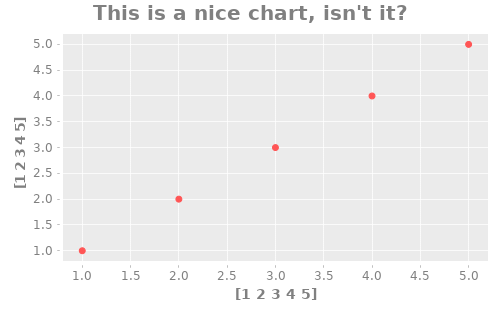

In [3]:
(chart/scatter-plot [1 2 3 4 5] [1 2 3 4 5] :title "This is a nice chart, isn't it?")

In [4]:
(a/set-chart-size! 200 200)

{:width 200, :height 200}

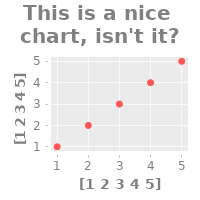

In [5]:
(chart/scatter-plot [1 2 3 4 5] [1 2 3 4 5] :title "This is a nice chart, isn't it?")

In [62]:
(require '[acausal.core :as a]
         '[acausal.html-table]
         '[clojure.core.matrix.dataset :as md]
         :reload)

In [73]:
(require '[semantic-csv.core :as sc])

In [78]:
(a/read-csv "tmp.csv"
            ;:header [:alpha :bravo :charlie :delta :echo :foxtrot :golf :hotel :indigo :juliet]
            ;:cast-fns {:a sc/->int})
            ;:cast-fns {:size (fn [s] (if (= s "small") 0 1))})
            ;:types {:a Long :b Long :c Long :d Long :e Long :f Long
             ;       :g Long :h Long :i Double :j Double})

:alpha,:bravo,:charlie,:delta,:echo,:foxtrot,:golf,:hotel,:indigo,:juliet
"""ablah""","""b""","""c""","""d""","""e""","""f""","""g""","""h""","""i""","""j"""
"""0blah""","""142""","""160""","""28""","""10""","""5""","""3""","""60""","""0.28""","""3167"""
"""1blah""","""175""","""180""","""18""","""8""","""4""","""1""","""12""","""0.43""","""4033"""
"""2blah""","""129""","""132""","""13""","""6""","""3""","""1""","""41""","""0.33""","""1471"""
"""3blah""","""138""","""140""","""17""","""7""","""3""","""1""","""22""","""0.46""","""3204"""
"""4blah""","""232""","""240""","""25""","""8""","""4""","""3""","""5""","""2.05""","""3613"""
"""5blah""","""135""","""140""","""18""","""7""","""4""","""3""","""9""","""0.57""","""3028"""
"""6blah""","""150""","""160""","""20""","""8""","""4""","""3""","""18""","""4.0""","""3131"""
"""7blah""","""207""","""225""","""22""","""8""","""4""","""2""","""16""","""2.22""","""5158"""
"""8blah""","""271""","""285""","""30""","""10""","""5""","""2""","""30""","""0.53""","""5702"""


In [3]:
(a/read-csv
    "https://raw.githubusercontent.com/oncletom/coursera-ml/master/week-1/people-example.csv"
    :types {:age Long})

:First Name,:Last Name,:Country,:age
"""Bob""","""Smith""","""United States""",24
"""Alice""","""Williams""","""Canada""",23
"""Malcolm""","""Jone""","""England""",22
"""Felix""","""Brown""","""USA""",23
"""Alex""","""Cooper""","""Poland""",23
"""Tod""","""Campbell""","""United States""",22
"""Derek""","""Ward""","""Switzerland""",25


In [14]:
(require '[clojure.repl :refer [doc]])

In [6]:
(require '[incanter.io :refer [read-dataset]])

In [108]:
(def tmp
    (read-dataset
    "https://people.sc.fsu.edu/~jburkardt/data/csv/biostats.csv"
    :header true
    :options {:rename-columns {"Height (in)" "height"}}))
tmp

:Name,:Sex,:Age,:height,:Weight (lbs)
"""Alex""","""M""",41.0,74.0,170.0
"""Bert""","""M""",42.0,68.0,166.0
"""Carl""","""M""",32.0,70.0,155.0
"""Dave""","""M""",39.0,72.0,167.0
"""Elly""","""F""",30.0,66.0,124.0
"""Fran""","""F""",33.0,66.0,115.0
"""Gwen""","""F""",26.0,64.0,121.0
"""Hank""","""M""",30.0,71.0,158.0
"""Ivan""","""M""",53.0,72.0,175.0
"""Jake""","""M""",32.0,69.0,143.0


In [110]:
(type (-> tmp :columns (nth 4) first))

java.lang.Double

In [116]:
(read-dataset "tmp.csv")

:col0,:col1,:col2,:col3,:col4,:col5,:col6,:col7,:col8,:col9
0.0,142.0,160.0,28.0,10.0,5.0,3.0,60.0,0.28,3167.0
1.0,175.0,180.0,18.0,8.0,4.0,1.0,12.0,0.43,4033.0
2.0,129.0,132.0,13.0,6.0,3.0,1.0,41.0,0.33,1471.0
3.0,138.0,140.0,17.0,7.0,3.0,1.0,22.0,0.46,3204.0
4.0,232.0,240.0,25.0,8.0,4.0,3.0,5.0,2.05,3613.0
5.0,135.0,140.0,18.0,7.0,4.0,3.0,9.0,0.57,3028.0
6.0,150.0,160.0,20.0,8.0,4.0,3.0,18.0,4.0,3131.0
7.0,207.0,225.0,22.0,8.0,4.0,2.0,16.0,2.22,5158.0
8.0,271.0,285.0,30.0,10.0,5.0,2.0,30.0,0.53,5702.0
9.0,89.0,90.0,10.0,5.0,3.0,1.0,43.0,0.3,2054.0


In [1]:
(require '[incanter.io :refer [read-dataset]])
(def tmp
    (read-dataset
        "https://people.sc.fsu.edu/~jburkardt/data/csv/homes.csv"
        :header true))

tmp


| :Sell | :List | :Living | :Rooms | :Beds | :Baths |  :Age | :Acres |  :Taxes |
|-------+-------+---------+--------+-------+--------+-------+--------+---------|
|   142 | 160.0 |    28.0 |   10.0 |   5.0 |    3.0 |  60.0 |   0.28 |  3167.0 |
|   175 | 180.0 |    18.0 |    8.0 |   4.0 |    1.0 |  12.0 |   0.43 |  4033.0 |
|   129 | 132.0 |    13.0 |    6.0 |   3.0 |    1.0 |  41.0 |   0.33 |  1471.0 |
|   138 | 140.0 |    17.0 |    7.0 |   3.0 |    1.0 |  22.0 |   0.46 |  3204.0 |
|   232 | 240.0 |    25.0 |    8.0 |   4.0 |    3.0 |   5.0 |   2.05 |  3613.0 |
|   135 | 140.0 |    18.0 |    7.0 |   4.0 |    3.0 |   9.0 |   0.57 |  3028.0 |
|   150 | 160.0 |    20.0 |    8.0 |   4.0 |    3.0 |  18.0 |    4.0 |  3131.0 |
|   207 | 225.0 |    22.0 |    8.0 |   4.0 |    2.0 |  16.0 |   2.22 |  5158.0 |
|   271 | 285.0 |    30.0 |   10.0 |   5.0 |    2.0 |  30.0 |   0.53 |  5702.0 |
|  89.0 |  90.0 |    10.0 |    5.0 |   3.0 |    1.0 |  43.0 |    0.3 |  2054.0 |
|   153 | 157.0 |    22.0 |

In [3]:
(def tmp
    (read-dataset
        "https://raw.githubusercontent.com/oncletom/coursera-ml/master/week-1/people-example.csv"
        :header true
        ;:skip 1
        :options {:rename-columns {"First Name" "hi", "Last Name" "bye", "Country" "try", "age" "die"}}))
tmp


|     :hi |     :bye |          :try | :die |
|---------+----------+---------------+------|
|     Bob |    Smith | United States |   24 |
|   Alice | Williams |        Canada |   23 |
| Malcolm |     Jone |       England |   22 |
|   Felix |    Brown |           USA |   23 |
|    Alex |   Cooper |        Poland |   23 |
|     Tod | Campbell | United States |   22 |
|   Derek |     Ward |   Switzerland |   25 |


In [100]:
(def tmp
    (read-dataset
        "https://raw.githubusercontent.com/oncletom/coursera-ml/master/week-1/people-example.csv"
        :header true
        :options {:rename-columns {"First Name" "hi", "Last Name" "bye", "Country" "try", "age" "die"}
                  :types {Float ["die"] String ["hi" "bye" "try"]}}))

tmp

:hi,:bye,:try,:die
"""Bob""","""Smith""","""United States""",24.0
"""Alice""","""Williams""","""Canada""",23.0
"""Malcolm""","""Jone""","""England""",22.0
"""Felix""","""Brown""","""USA""",23.0
"""Alex""","""Cooper""","""Poland""",23.0
"""Tod""","""Campbell""","""United States""",22.0
"""Derek""","""Ward""","""Switzerland""",25.0


In [96]:
(-> tmp :columns (nth 3) first type)

java.lang.Float

In [97]:
(def tmp2
    (read-dataset
        "http://samplecsvs.s3.amazonaws.com/Sacramentorealestatetransactions.csv"
        :header true))

#'user/tmp2

In [51]:
(a/read-csv-tmp "https://people.sc.fsu.edu/~jburkardt/data/csv/ford_escort.csv")

({:Year "1998", : "Mileage (thousands)" "  27", :  "Price" "    9991 "} {:Year "1997", : "Mileage (thousands)" "  17", :  "Price" "    9925 "} {:Year "1998", : "Mileage (thousands)" "  28", :  "Price" "   10491 "} {:Year "1998", : "Mileage (thousands)" "   5", :  "Price" "   10990 "} {:Year "1997", : "Mileage (thousands)" "  38", :  "Price" "    9493 "} {:Year "1997", : "Mileage (thousands)" "  36", :  "Price" "    9991 "} {:Year "1997", : "Mileage (thousands)" "  24", :  "Price" "   10490 "} {:Year "1997", : "Mileage (thousands)" "  37", :  "Price" "    9491 "} {:Year "1997", : "Mileage (thousands)" "  38", :  "Price" "    9491 "} {:Year "1997", : "Mileage (thousands)" "  30", :  "Price" "    9990 "} {:Year "1997", : "Mileage (thousands)" "  38", :  "Price" "    9491 "} {:Year "1997", : "Mileage (thousands)" "  25", :  "Price" "    9990 "} {:Year "1997", : "Mileage (thousands)" "  39", :  "Price" "    9990 "} {:Year "1997", : "Mileage (thousands)" "  22", :  "Price" "    9390 "} {:Yea

In [43]:
(a/read-csv "https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv")

:Month,": ""1958""",": ""1959""",": ""1960"""
"""JAN""",""" 340""",""" 360""",""" 417"""
"""FEB""",""" 318""",""" 342""",""" 391"""
"""MAR""",""" 362""",""" 406""",""" 419"""
"""APR""",""" 348""",""" 396""",""" 461"""
"""MAY""",""" 363""",""" 420""",""" 472"""
"""JUN""",""" 435""",""" 472""",""" 535"""
"""JUL""",""" 491""",""" 548""",""" 622"""
"""AUG""",""" 505""",""" 559""",""" 606"""
"""SEP""",""" 404""",""" 463""",""" 508"""
"""OCT""",""" 359""",""" 407""",""" 461"""


In [55]:
(with-open [reader (io/reader "https://people.sc.fsu.edu/~jburkardt/data/csv/letter_frequency.csv")]
    (let [data (csv/read-csv reader)]
        (doall
        data)))

(["Letter" " \"Frequency\"" " \"Percentage\""] ["    \"A\"" "  24373121" "  8.1"] ["    \"B\"" "   4762938" "  1.6"] ["    \"C\"" "   8982417" "  3.0"] ["    \"D\"" "  10805580" "  3.6"] ["    \"E\"" "  37907119" " 12.6"] ["    \"F\"" "   7486889" "  2.5"] ["    \"G\"" "   5143059" "  1.7"] ["    \"H\"" "  18058207" "  6.0"] ["    \"I\"" "  21820970" "  7.3"] ["    \"J\"" "    474021" "  0.2"] ["    \"K\"" "   1720909" "  0.6"] ["    \"L\"" "  11730498" "  3.9"] ["    \"M\"" "   7391366" "  2.5"] ["    \"N\"" "  21402466" "  7.1"] ["    \"O\"" "  23215532" "  7.7"] ["    \"P\"" "   5719422" "  1.9"] ["    \"Q\"" "    297237" "  0.1"] ["    \"R\"" "  17897352" "  5.9"] ["    \"S\"" "  19059775" "  6.3"] ["    \"T\"" "  28691274" "  9.5"] ["    \"U\"" "   8022379" "  2.7"] ["    \"V\"" "   2835696" "  0.9"] ["    \"W\"" "   6505294" "  2.2"] ["    \"X\"" "    562732" "  0.2"] ["    \"Y\"" "   5910495" "  2.0"] ["    \"Z\"" "     93172" "  0.0"] [""])

In [15]:
(require '[incanter.io :refer [read-dataset]])

In [17]:
(read-dataset "https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv"
              :header true)

:Month,:1958,:1959,:1960
"""JAN""",340.0,360.0,417.0
"""FEB""",318.0,342.0,391.0
"""MAR""",362.0,406.0,419.0
"""APR""",348.0,396.0,461.0
"""MAY""",363.0,420.0,472.0
"""JUN""",435.0,472.0,535.0
"""JUL""",491.0,548.0,622.0
"""AUG""",505.0,559.0,606.0
"""SEP""",404.0,463.0,508.0
"""OCT""",359.0,407.0,461.0


In [26]:
(doc read-dataset
    )

-------------------------
incanter.io/read-dataset
([filename & {:keys [delim keyword-headers quote skip header compress-delim empty-field-value comment-char options], :or {delim \,, quote \", skip 0, header false, keyword-headers true, options nil}}])
  
  Returns a dataset read from a file or a URL.

  Options:
    :delim (default \,), other options (\tab \space \|  etc)
    :quote (default \") character used for quoting strings
    :skip (default 0) the number of lines to skip at the top of the file.
    :header (default false) indicates the file has a header line
    :compress-delim (default true if delim = \space, false otherwise) means
                    compress multiple adjacent delimiters into a single delimiter.
    :empty-field-value (default nil) indicates the interpretation of an empty field.
    :comment-char (default nil) skip commented lines ("#", "%", ";", etc)
    :default-type (default nil) default type of columns.
    :types (default nil) dictionary mapping types t

In [36]:
(require '[clojure-csv.core :as csv]
         '[clojure.java.io :as io])

In [39]:
(with-open [infile (io/reader "/home/josh/Downloads/airtravel.csv")]
  (doall
    (csv/parse-csv infile)))

(["Month" " \"1958\"" " \"1959\"" " \"1960\""] ["JAN" "  340" "  360" "  417"] ["FEB" "  318" "  342" "  391"] ["MAR" "  362" "  406" "  419"] ["APR" "  348" "  396" "  461"] ["MAY" "  363" "  420" "  472"] ["JUN" "  435" "  472" "  535"] ["JUL" "  491" "  548" "  622"] ["AUG" "  505" "  559" "  606"] ["SEP" "  404" "  463" "  508"] ["OCT" "  359" "  407" "  461"] ["NOV" "  310" "  362" "  390"] ["DEC" "  337" "  405" "  432"] [""])

In [ ]:
(csv/)